# DOMAIN: Startup ecosystem

### Overview:

Company X, a leading Indian online publisher dedicated to startup industry insights, is driven by a mission to empower its audience with actionable knowledge. In the dynamic world of startups, the company recognizes the crucial need to answer a pivotal question: What financial factors differentiate thriving, currently operating startups from those that ultimately cease operations? 

### Objective:

This project seeks to address the critical questions of whether there is a statistically significant difference in the mean funds raised by startups that are currently operating compared to those that have ceased operations. Additionally, we aim to investigate whether there exists a significant disparity in the number of funding rounds between currently operating startups and startups that have closed.


*Note*:

*- Dataset Credits --> https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase
Filter on country and status column*

*- Unauthorised use or distribution of this project prohibited @dataanalystduo*

### Plan of Action:


1. **Formulating the Hypothesis**: Begin by crafting clear and testable hypotheses that lay the foundation for your analysis.

2. **Data Exploration and Validation**: Dive into the dataset, conducting a thorough examination to ensure its quality and coherence, while also gaining a deeper understanding of the data.

3. **Selecting the Appropriate Statistical Test**: Identify the most suitable statistical tests or methods that align with your hypotheses and objectives.

4. **Statistical Analysis**: Execute the selected tests or analyses on the dataset, generating meaningful insights and drawing statistically sound conclusions.

5. **Concluding Insights**: Summarize the findings and conclusions drawn from the analysis, providing actionable insights that address your research objectives effectively.

In [7]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [8]:
# Read the Excel file 
startup_df = pd.read_excel(r"D:\Data_Analyst_duo\Level 2 20230727\Project\Funding Dataset.xlsx")

C:\Users\Aditi\AppData\Local\Temp/ipykernel_20308/1149610768.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  startup_df = pd.read_excel(r"D:\Data_Analyst_duo\Level 2 20230727\Project\Funding Dataset.xlsx")


In [13]:
# View the data
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16.0,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507.0,operating,IND,10.0,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000.0,operating,IND,19.0,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000.0,operating,IND,36.0,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000.0,operating,IND,19.0,Bangalore,Bangalore,2,2006-06-01,2007-12-01,2010-08-01


In [14]:
startup_df.shape

(1134, 14)

In our dataset, we have gathered data on 1,134 startups based in India, capturing essential details across 13 columns. While all columns provide valuable information, our primary focus for this particular analysis will be directed towards understanding the dynamics of these startups through the lens of their "Status," "Funding Total (in USD)," and "Funding Rounds." 

#### Step 1: Building Hypothesis:

##### Mean Funds Raised

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

    
##### Number of Funding Rounds
Null Hypothesis (H0): There is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

#### Step 2: Data Exploration and Validation

In [17]:
# Check for duplicate rows

startup_df.drop_duplicates().shape

(1134, 14)

There is no duplication.

In [46]:
# Assuming startup_df is your DataFrame
columns_to_check = ['status', 'funding_total_usd', 'funding_rounds']

# Check for null values in the specified columns
null_counts = startup_df[columns_to_check].isnull().sum()

# Display the null value counts for each column
print(null_counts)

status               0
funding_total_usd    0
funding_rounds       0
dtype: int64


There is no null value in the variables of our interest.

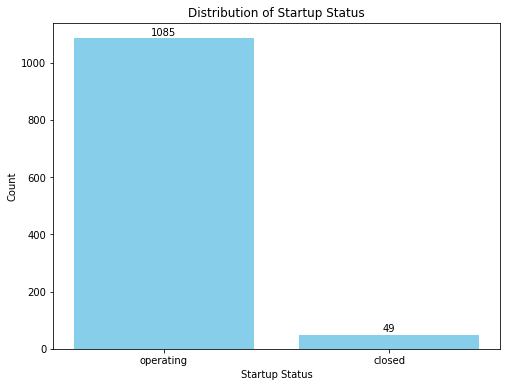

In [34]:
# Visualize 'Status' column

status_counts = startup_df['status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')
plt.xlabel('Startup Status')
plt.ylabel('Count')
plt.title('Distribution of Startup Status')

# Adding data labels (count values) to the bars
for i, v in enumerate(status_counts):
    plt.text(i, v + 10, v, ha='center')
    # i: This is the x-coordinate where the data label will be placed.
    # v + 10: This is the y-coordinate where the data label will be placed
    # ha='center': This parameter specifies the horizontal alignment of the text, ensuring that it's centered above each bar.

# Display the plot
plt.show()

In [45]:
# Let us understand more about funding column

# Set the display format for float numbers to display complete numbers
pd.options.display.float_format = '{:.0f}'.format

# By setting pd.options.display.float_format to ' {:.0f}'.format, you instruct pandas to format floating-point numbers with 
# zero decimal places, effectively displaying complete numbers.

# Assuming startup_df is your DataFrame
description = startup_df['funding_total_usd'].describe()

# Display the description with complete numbers
print(description)

count         1134
mean      23391193
std      153640842
min            569
25%         200000
50%        1275000
75%       10000000
max     3151140000
Name: funding_total_usd, dtype: float64


Overall average funding raised in 23 million dollars. Minimum funding is just 569 dollars and maximum is 3 billion dollars

In [42]:
# Maximum funding
startup_df[startup_df['funding_total_usd']==3151140000]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01,2009-01-01,2015-07-28


The highest funding amount is attributed to Flipkart, a notable leader in the industry, aligning with its substantial financial requirements and prominence.

In [44]:
# Least funded

startup_df[startup_df['funding_total_usd']==569]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
834,/organization/ruralserver,RuralServer,http://www.ruralserver.com,Cloud Computing|Cloud Data Services|Domains|Internet|Networking|Services|Web Design|Web Development|Web Hosting,569,operating,IND,36,New Delhi,Noida,1,2010-01-01,2013-10-17,2013-10-17


Rural Server, despite being one of the least funded startups, intriguingly continues to operate successfully.

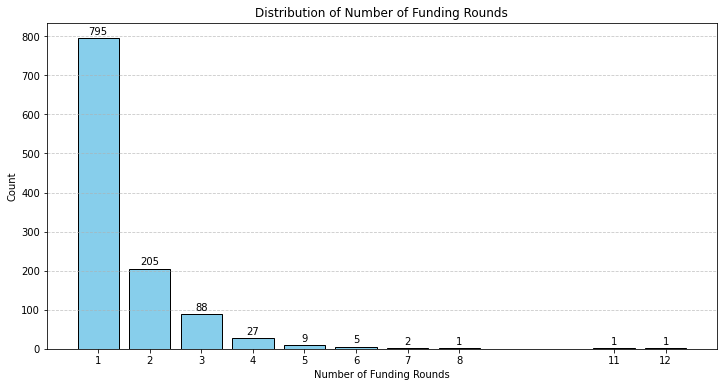

In [60]:
# Assuming startup_df is your DataFrame
funding_round_counts = startup_df['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars= plt.bar(funding_round_counts.index, funding_round_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.title('Distribution of Number of Funding Rounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis ticks explicitly to ensure all values are visible
plt.xticks(funding_round_counts.index)

# Adding data labels (count values) to the bars
for bar, count in zip(bars, funding_round_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
# bar.get_x() + bar.get_width() / 2: This part determines the x-coordinate where the data label will be placed. 
# It calculates the center of the current bar by adding half of the bar's width to its starting x-coordinate.
# bar.get_height() + 10: This part determines the y-coordinate where the data label will be placed. 
# It positions the label slightly above the top of the bar by adding 10 units to the bar's height.

# Display the plot
plt.show()

Remarkably, the majority of startups in our dataset, precisely 795 of them, have undergone just one round of funding. In stark contrast, only two startups have secured more than eight rounds of funding. Now, let's delve into identifying these exceptional outliers within the dataset.

While running the hypothesis test we can create 3 categories for no. of funding rounds ~ 1, 2, 3+

In [61]:
startup_df[startup_df['funding_rounds']==11]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
889,/organization/snapdeal,Snapdeal,http://www.snapdeal.com,E-Commerce,1897699998,operating,IND,7,New Delhi,New Delhi,11,2010-01-01,2011-01-01,2015-08-18


In [62]:
startup_df[startup_df['funding_rounds']==12]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
321,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01,2009-01-01,2015-07-28


These represent some of the foremost e-commerce platforms, notably Snapdeal and Flipkart.

Now that we've gained a comprehensive understanding of the dataset, let's proceed to test our hypothesis.

#### Step 3: Selecting the Appropriate Statistical Test

### Mean Funds Raised

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Using an independent sample t-test in this context is justified for the following reasons:
1. Comparing Two Independent Groups: The independent sample t-test is suitable when we are comparing two separate and independent groups, which aligns perfectly with our scenario of comparing currently operating startups with startups that have closed. These two groups are distinct and unrelated in terms of their current status.

2. Continuous Numeric Data: The t-test is designed for comparing means of continuous numerical data, which is precisely what we have in our hypothesis testing. We are interested in comparing the mean funds raised, a continuous variable, between the two groups.

3. Normal Distribution Assumption: The t-test assumes that the data within each group follows a normal distribution. While this assumption should be checked, it often holds reasonably well for financial data, especially when the sample size is sufficiently large ~ we know basis EDA that both have >30 sample size

4. Homogeneity of Variance: We must check that using Levene Test.

The Levene's Test is a statistical test used to assess whether the variances of two or more groups are equal or homogenous. It is particularly valuable when comparing multiple groups with the same independent variable to ensure that the assumption of homogeneity of variances, a key assumption in many statistical tests, is met.

**Null Hypothesis (H0):** The null hypothesis in Levene's Test is that there are no significant differences in the variances of the groups being compared. In other words, it assumes that the variances are equal across all groups.

**Alternative Hypothesis (H1):** The alternative hypothesis in Levene's Test is that there are significant differences in the variances of the groups being compared. If the p-value is sufficiently small, you would reject the null hypothesis in favor of the alternative, indicating that at least one group has a significantly different variance compared to the others.

In practical terms, Levene's Test helps you determine whether it's appropriate to use statistical tests that assume equal variances across groups, such as the independent sample t-test or analysis of variance (ANOVA). If the test indicates unequal variances, you may need to consider alternative statistical methods that are more robust to heteroscedasticity (unequal variances).

Overall, Levene's Test is a valuable tool in the field of statistics for assessing the homogeneity of variances and ensuring the validity of subsequent statistical analyses.

In [66]:
from scipy import stats

group1 = startup_df[startup_df['status'] == 'operating']['funding_total_usd']
group2 = startup_df[startup_df['status'] == 'closed']['funding_total_usd']

stat, p_value = stats.levene(group1, group2)
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

Levene's Test Statistic: 0.36074537025282777
P-value: 0.5482127964683872
Fail to reject the null hypothesis: Variances are equal.


We have determined that the variances are equal, thus meeting the assumption for the independent sample t-test. We can now proceed with the independent sample t-test confidently."

### Number of Funding Rounds

The Chi-Square Test of Independence is typically used when you have categorical data and you want to investigate whether there is a statistically significant association or relationship between two categorical variables. 

In our case, you are interested in the number of funding rounds (which is likely a discrete, count variable) and the status of startups (which is categorical - either "currently operating" or "closed"). 

Here's why the Chi-Square Test of Independence is suitable for our hypothesis. 

We know that observations are independent, Cells in the contingency table are mutually exclusive, The only thing we need to check is if ~ Expected value of cells should be 5 or greater in at least 80% of cells.

#### Step 4 & 5: Statistical Analysis & Conclusion

### Mean Fund Raised

In [67]:
# No. of startups which are operating
startup_df[startup_df['status']=='operating']['funding_total_usd'].count()

1085

In [68]:
startup_df[startup_df['status']=='closed']['funding_total_usd'].count()

49

In [69]:
# Create a new data frame of only those companies which are still operating and their respective funds

df1 = startup_df.loc[startup_df['status'] == 'operating', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample1'}).reset_index(drop=True)

In [71]:
df1.head()

,Funds_Sample1
0,10000000
1,6369507
2,4000000
3,20000
4,2065000


In [70]:
# Create a new data frame of only those companies which are closed and their respective funds

df2 = startup_df.loc[startup_df['status'] == 'closed', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample2'}).reset_index(drop=True)

In [72]:
df2.head()

,Funds_Sample2
0,25000
1,10000
2,10000000
3,40000
4,25000000


In [73]:
# Creating a new dataframe for further analysis
df3 = pd.concat([df1, df2], axis = 1)
df3.head()

,Funds_Sample1,Funds_Sample2
0,10000000,25000
1,6369507,10000
2,4000000,10000000
3,20000,40000
4,2065000,25000000


In [74]:
# Funds_Sample1 represents funds for operating startup

# Mean funds (in million) for startup which are operating
mean_1=df3['Funds_Sample1'].mean()

print('Mean funds (in million) for startup which are operating is:',mean_1)

Mean funds (in million) for startup which are operating is: 23981373.343251728


In [75]:
# Funds_Sample2 represents funds for closed startup

# Mean funds (in million) for startup which are closed
mean_2=df3['Funds_Sample2'].mean()

print('Mean funds (in million) for startup which are closed is:',mean_2)

Mean funds (in million) for startup which are closed is: 10322911.346938776


Null Hypothesis

H0= there is no significant difference between the mean funds raised by the two groups i.e. startups which are operating & startups which are closed

i.e. H0: mean_1 = mean_2

Alternative hypothesis

H1 = there is significant difference between the mean funds raised by the two groups i.e. startups which are operating & startups which are closed

i.e. H1: mean_1 != mean_2

Also our alpha is 0.05

In [76]:
#load library

from scipy.stats import ttest_ind

In [84]:
# Hypothesis Testing

t, pvalue = ttest_ind(df3['Funds_Sample1'], df3['Funds_Sample2'], nan_policy = 'omit')

# Print results
print('T-statistic:', t)
print('P-value:', pvalue)

T-statistic: 0.6085283061630911
P-value: 0.5429592211146083


The p-value, which is greater than the chosen alpha level (i.e., 0.54 > 0.05), leads us to fail to reject the null hypothesis with 95% confidence. Therefore, we conclude that there is no statistically significant difference in the funds raised between currently operating startups and closed startups.

### Number of Funding Rounds

In [78]:
# Define a function to categorize funding rounds
def categorize_rounds(round):
    if round == 1:
        return '1'
    elif round == 2:
        return '2'
    else:
        return '3+'

# Apply the categorize_rounds function to create a new 'category' column
startup_df['rounds of funding category'] = startup_df['funding_rounds'].apply(categorize_rounds)

# Print the DataFrame with the new category column
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,rounds of funding category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,1
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15,1
2,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06,1
3,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06,1
4,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000,operating,IND,19,Bangalore,Bangalore,2,2006-06-01,2007-12-01,2010-08-01,2


In [79]:
# Create cross tab
pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

status,closed,operating
rounds of funding category,,
1,39,756
2,7,198
3+,3,131


In [81]:
contingency_table = pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

# Calculate expected frequencies
expected_frequencies = stats.contingency.expected_freq(contingency_table)

# Create a DataFrame to display the expected frequencies
expected_df = pd.DataFrame(expected_frequencies, columns=contingency_table.columns, index=contingency_table.index)

# Display the expected frequencies
print("Expected Frequencies:")
print(expected_df)

Expected Frequencies:
status                      closed  operating
rounds of funding category                   
1                               34        761
2                                9        196
3+                               6        128


All the values in the expected frequencies exceed the threshold of 5, indicating that our dataset meets the assumption of expected cell frequencies for the Chi-Square Test of Independence. Consequently, we are well-equipped to advance with our hypothesis testing

In [82]:
# Import library
from scipy.stats import chi2_contingency

# Run the Chi Square Test

chi2, pval, dof, exp_freq = chi2_contingency(contingency_table, correction = False)
print('The p-value is',pval)

The p-value is 0.2908506204110049


p value > 0.06 as a result, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed, based on our dataset and chosen level of significance.

Based on the statistical analyses conducted, it can be concluded that:

There is no statistically significant difference in the funds raised by currently operating startups and startups that have closed, as per the independent sample t-test.
There is no statistically significant association between the number of funding rounds and the status of startups, as indicated by the Chi-Square Test of Independence.

## THANK YOU 